In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from calibration.calibration import FilmCalibration

In [34]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 14})

In [35]:
calibracion = FilmCalibration.from_json("calibracion_test.json")

In [36]:
for key, value in calibracion.__dict__.items():
    #print(f"{key}: {value}")
    continue

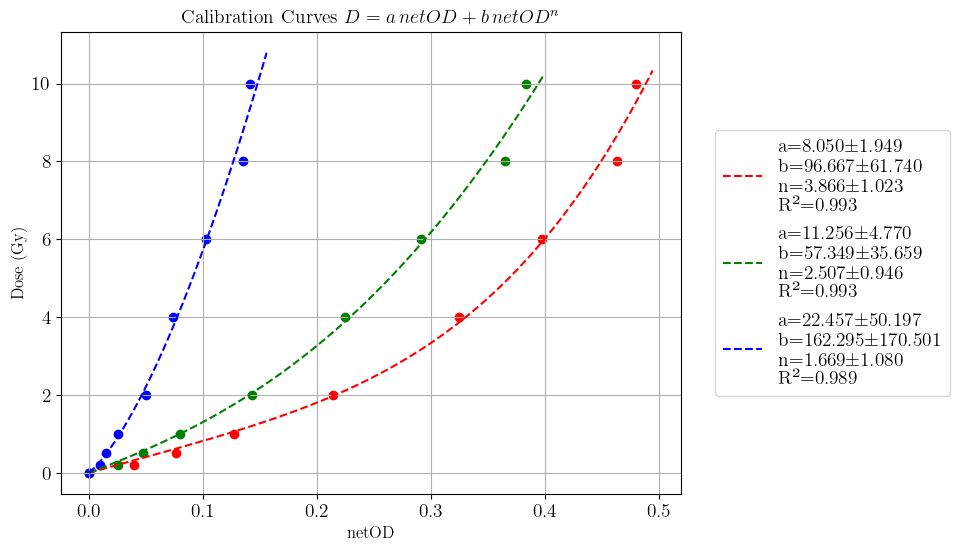

In [37]:
calibracion.graph_calibration_curve()

In [38]:
film_path = os.path.join("media", "mama100cropped.tif")
dose_map = calibracion.compute_dose_map(film_path, channel=2)

print(dose_map)

[[1.25070197 0.91682158 0.2382032  ... 0.2382032  0.48156467 0.35490414]
 [1.25070197 1.07948767 0.6176541  ... 0.2382032  0.35490414 0.35490414]
 [1.07948767 1.07948767 0.6176541  ... 0.35490414 0.35490414 0.35490414]
 ...
 [0.91682158 0.91682158 0.48156467 ... 0.76282061 0.76282061 0.76282061]
 [0.91682158 0.91682158 0.35490414 ... 0.76282061 0.76282061 0.76282061]
 [0.48156467 0.35490414 0.35490414 ... 0.76282061 1.07948767 0.76282061]]


c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\calibration\functions.py:56: RuntimeWarning: invalid value encountered in power
  return a * x + b * (x ** n)


In [39]:
a = dose_map.flatten()
print(a)
print(len(a))


b = np.sort(a)
print(b[-1000:])

[1.25070197 0.91682158 0.2382032  ... 0.76282061 1.07948767 0.76282061]
757680
[4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292 4.54127292
 4.54127292 4.54127292 4.54127292 4.54127292 4.541

In [40]:
dose_map.min()

np.float64(0.0)

In [41]:
dose_map.max()

np.float64(5.802703403304452)

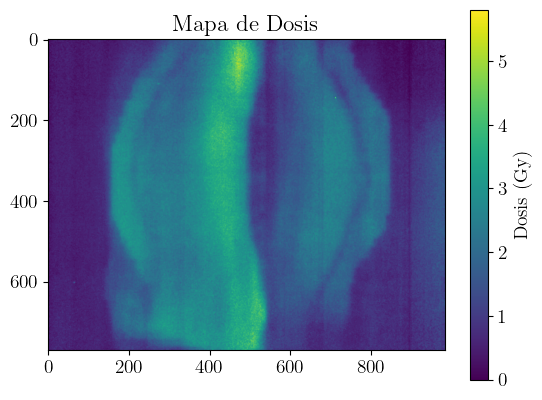

In [42]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.show()


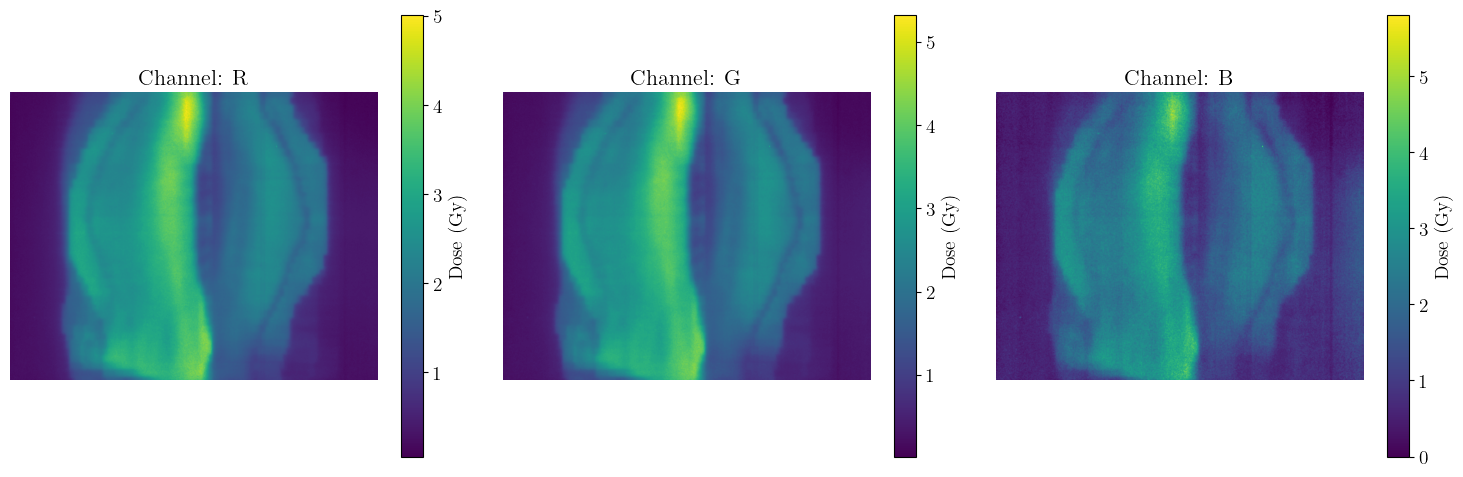

In [47]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)

import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i])
    axs[i].set_title(f'Channel: {canales[i]}', fontsize=16)
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dose (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


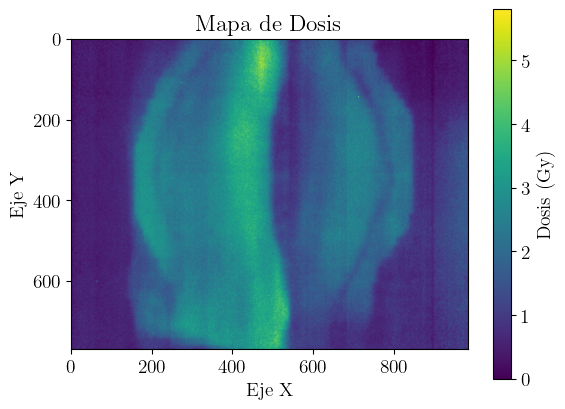

In [44]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


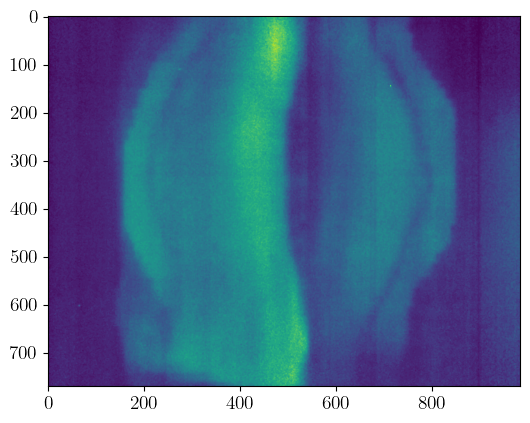

In [45]:
# plot dose map

import matplotlib.pyplot as plt

plt.imshow(dose_map)

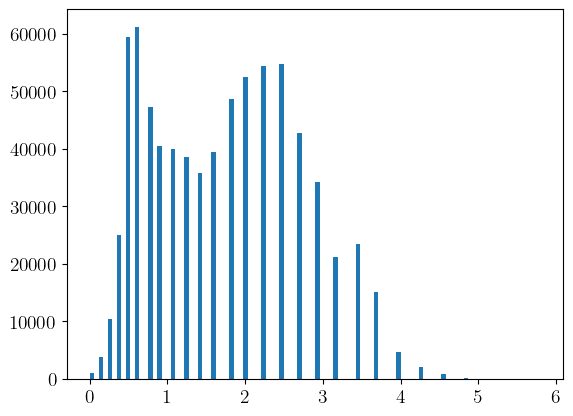

In [46]:
# histograma del mapa
plt.figure()
plt.hist(dose_map.flatten(), bins=100)
plt.show()